# Training 

Load all dependancies

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
import pickle
df = pd.read_csv('/workspaces/2025SE_Gianfranco.M_CSAI/1. Data/csgo_round_snapshots.csv')
X = df.drop(columns=['round_winner'])
scaler = preprocessing.StandardScaler()
label_encoder = preprocessing.LabelEncoder() 
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])
df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])
df['map'] = label_encoder.fit_transform(df['map'])

PICKLEEE !! data

In [4]:
with open('split_data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

### We will now need to train and test our machine learning model

In [5]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7496
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482

Decision Tree Accuracy: 0.8198
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482

Random Forest Accuracy: 0.8789
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12004
           1       0.89      0.87      0.88     12478

    accuracy                           0.88     24482
   macro avg       0.88      

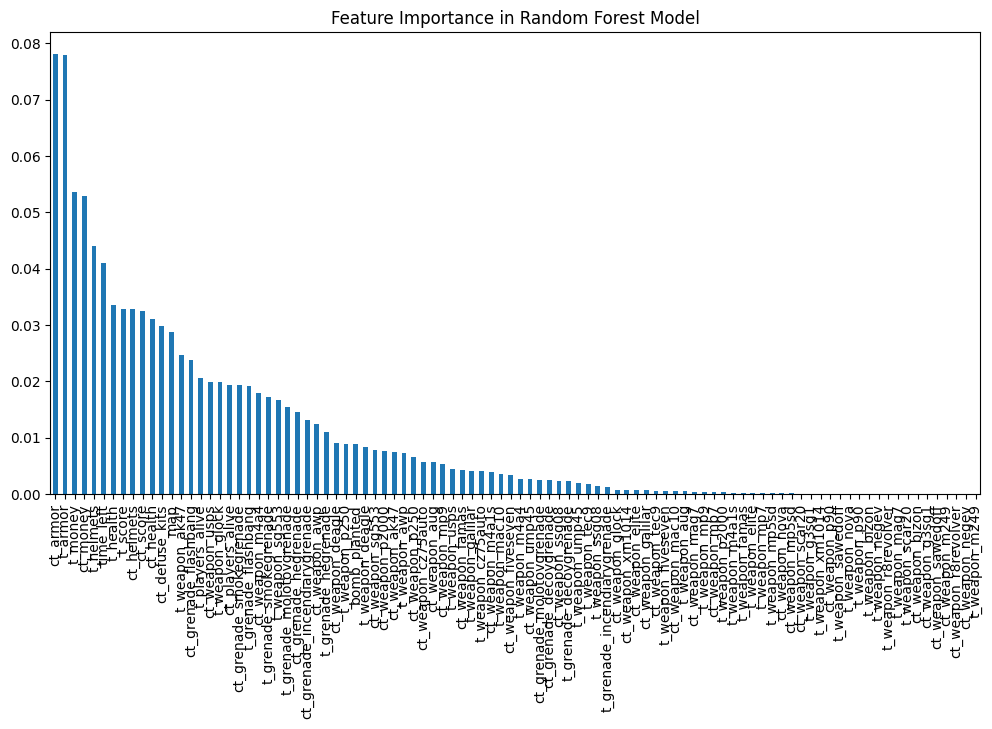

In [10]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [18]:
def predict_round_winner(model, scaler, label_encoder, X_train_columns):
    ct_money = float(input("enter counter-terrorist money: "))
    t_money = float(input("enter terrorist money: "))
    ct_players_alive = int(input("enter counter-terrorists alive: "))
    t_players_alive = int(input("enter terrorists alive: "))
    bomb_planted = int(input("has the bomb been planted? (0 = no, 1 = yes): "))

    map_name = input("Map Name (e.g., de_dust2): ")

    if map_name in label_encoder.classes_:
        map_encoded = label_encoder.transform([map_name])[0]
    else:
        print("not in dataset.")
        map_encoded = -1 

    input_dict = {
        "ct_money": ct_money,
        "t_money": t_money,
        "ct_players_alive": ct_players_alive,
        "t_players_alive": t_players_alive,
        "map_encoded": map_encoded,
        "bomb_planted": bomb_planted
    }

    input_data = pd.DataFrame([input_dict])
    input_data = input_data.reindex(columns=X_train_columns, fill_value=0)
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    winner = "Counter-Terrorists" if prediction[0] == 0 else "Terrorists"

    print(f"\n winner: {winner}")

predict_round_winner(rf_model, label_encoder, X.columns)


TypeError: predict_round_winner() missing 1 required positional argument: 'X_train_columns'